<a href="https://colab.research.google.com/github/JyotikaUppar/CodSoft/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##importing the Python Library

In [48]:


# NumPy is used for numerical operations, arrays, and mathematical functions
import numpy as np

# Pandas is used for handling and analyzing structured data (DataFrames, CSVs, Excel, etc.)
import pandas as pd

# Matplotlib is used for creating basic plots, graphs, and visualizations
import matplotlib.pyplot as plt

# Seaborn is built on top of Matplotlib and is used for advanced, beautiful, and statistical plots
import seaborn as sns

# Warnings module is used to control warning messages
import warnings

# Ignore all warning messages to keep the output clean
warnings.filterwarnings('ignore')

# train_test_split is used to split data into training and testing sets for machine learning
from sklearn.model_selection import train_test_split

# LogisticRegression is a machine learning algorithm used for binary/multiclass classification
from sklearn.linear_model import LogisticRegression

#accuracy_score is used to evaluate how well a model's predictions match the true labels
from sklearn.metrics import accuracy_score


## Data collection and preprocessing


In [49]:
#load the data from csv file to pandas data frame
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')
#printing the first 5 row
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
#Printing the number of row and columns
titanic_data.shape

(891, 12)

In [51]:
#getting information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
# Check for missing (NaN) values in each column of the Titanic dataset
# isnull() → marks missing values as True
# sum() → counts total missing values per column
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [53]:
#drop the cabin column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)
#replacing the missing values in the age colums with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [54]:
#Finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [55]:
print(titanic_data['Embarked'].mode()[0])

S


In [56]:
#replacing the missing value in Embarked column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [57]:
#checking for missing values Again
# Check for missing (NaN) values in each column of the Titanic dataset
# isnull() → marks missing values as True
# sum() → counts total missing values per column
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Data Analysis


In [58]:
#getting some statical measure about the data
titanic_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Finding the number of people servived and not survived


In [59]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


The Data Visualization Step


In [60]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

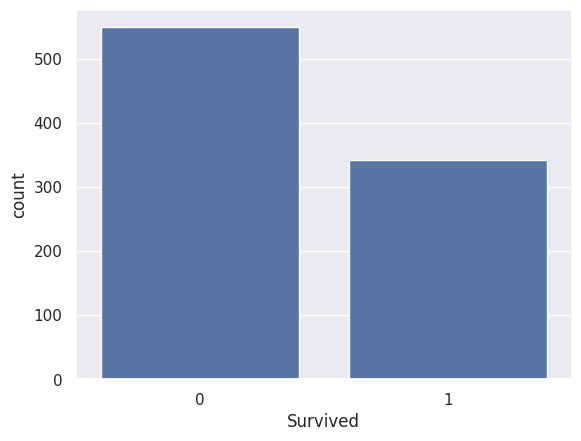

In [61]:
#making a count plot for survived column
sns.countplot(x='Survived', data = titanic_data)


In [62]:
#counting the data
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

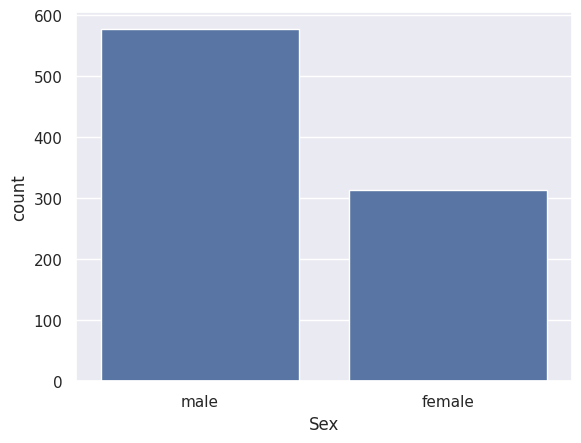

In [63]:

sns.countplot(x='Sex', data = titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

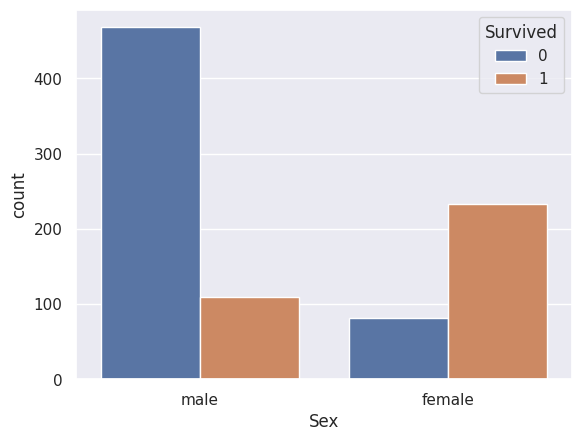

In [64]:
#number of surviver Gender based
sns.countplot(x='Sex', hue='Survived', data = titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

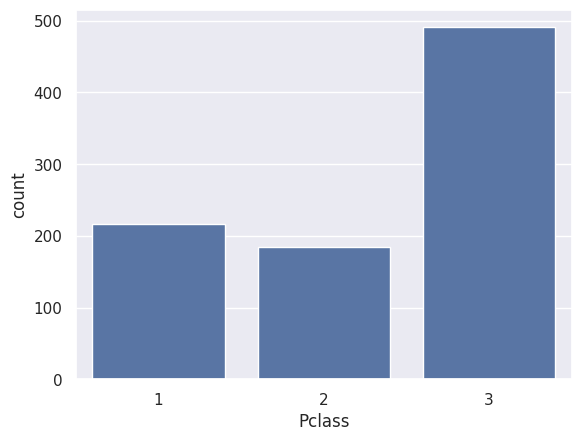

In [65]:
#based on pclass
sns.countplot(x='Pclass', data = titanic_data)


<Axes: xlabel='Pclass', ylabel='count'>

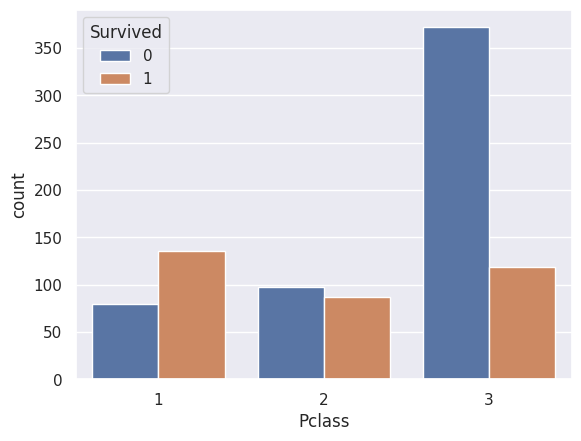

In [66]:
sns.countplot(x='Pclass', hue='Survived', data = titanic_data)

<Axes: xlabel='SibSp', ylabel='count'>

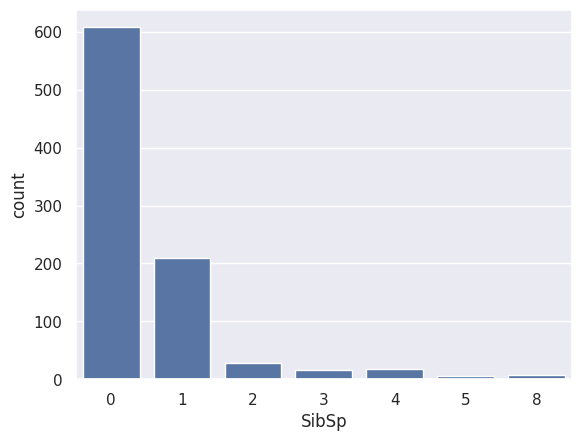

In [67]:
#based on SibSp
sns.countplot(x='SibSp', data = titanic_data)

<Axes: xlabel='SibSp', ylabel='count'>

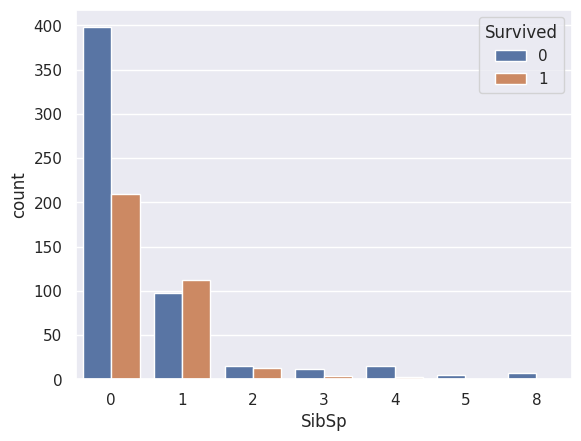

In [68]:
sns.countplot(x='SibSp', hue='Survived', data = titanic_data)

<Axes: xlabel='Parch', ylabel='count'>

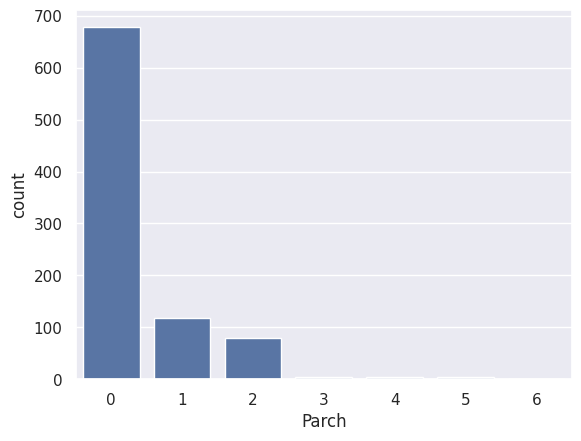

In [69]:
#based on parch
sns.countplot(x='Parch', data = titanic_data)

<Axes: xlabel='Parch', ylabel='count'>

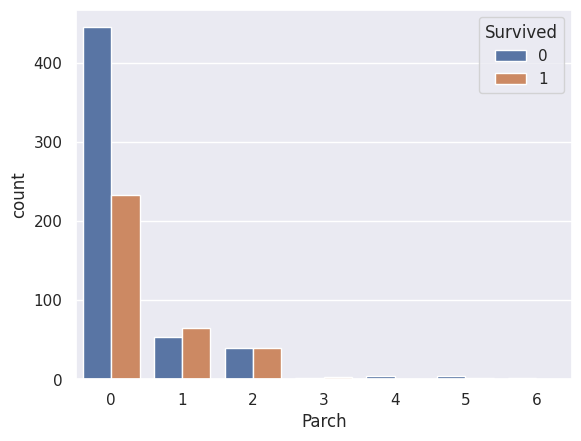

In [70]:
sns.countplot(x='Parch', hue='Survived', data = titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

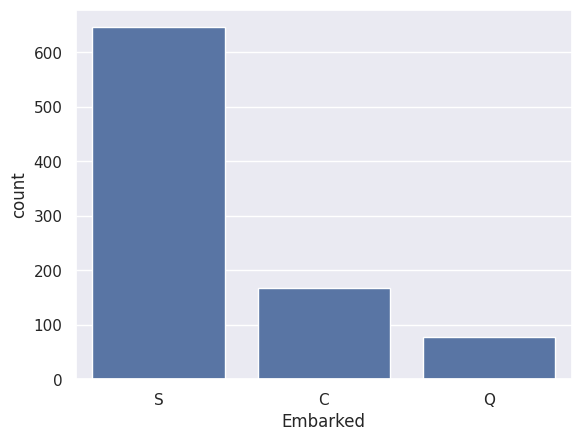

In [71]:
#based on Embarked
sns.countplot(x='Embarked', data = titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

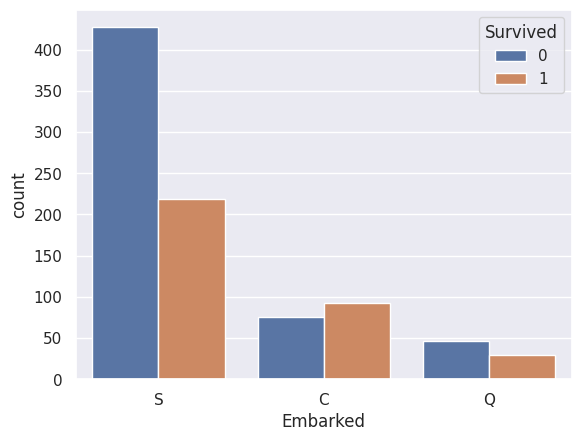

In [72]:
sns.countplot(x='Embarked', hue='Survived', data = titanic_data)

In [73]:

# Now, we can create the 'FamilySize' column.
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

In [74]:
#isAlone
titanic_data['IsAlone'] = 0
titanic_data.loc[titanic_data['FamilySize'] == 1, 'IsAlone'] = 1

In [75]:
titanic_data['Title'] = titanic_data['Name'].str.extract('([A-Za-z]+)\.',expand=False)
#Group rare titles
titanic_data['Title'] = titanic_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
titanic_data['Tittle'] = titanic_data['Title'].replace('Mlle','Miss')
titanic_data['Tittle'] = titanic_data['Title'].replace('Ms','Miss')
titanic_data['Tittle'] = titanic_data['Title'].replace('Mme','Mrs')

In [76]:
#AgeGroup bins
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=[0,12,19,65,np.inf], labels=['Child','Teenager','Adult','Senior'])

##Encoding the Categorical columns
as we cannot give words directly to Machine learning model we will change it in 0,1 for eg female=1,male=0

In [77]:
#converting categorical columns
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [78]:
#seprating features & Target
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived','Age','Fare','FamilySize'],axis=1)
Y = titanic_data['Survived']

In [79]:
print(X)

     Pclass  Sex  SibSp  Parch  Embarked  IsAlone Title Tittle  AgeGroup
0         3    0      1      0         0        0    Mr     Mr     Adult
1         1    1      1      0         1        0   Mrs    Mrs     Adult
2         3    1      0      0         0        1  Miss   Miss     Adult
3         1    1      1      0         0        0   Mrs    Mrs     Adult
4         3    0      0      0         0        1    Mr     Mr     Adult
..      ...  ...    ...    ...       ...      ...   ...    ...       ...
886       2    0      0      0         0        1  Rare   Rare     Adult
887       1    1      0      0         0        1  Miss   Miss  Teenager
888       3    1      1      2         0        0  Miss   Miss     Adult
889       1    0      0      0         1        1    Mr     Mr     Adult
890       3    0      0      0         2        1    Mr     Mr     Adult

[891 rows x 9 columns]


In [80]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [82]:
#spliting the data into training data & Testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

In [96]:
print(X.shape, X_train.shape, X_test.shape)

(891, 25) (712, 25) (179, 25)


In [83]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
# Split the data into training and testing sets *after* encoding
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)


# Now, you can train your models
models = {
    "LR": LogisticRegression(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "GB": GradientBoostingClassifier()
}
result ={}
for name , model in models.items():
  model.fit(X_train,Y_train)
  result[name] = model.score(X_test,Y_test)
  display(pd.DataFrame.from_dict(result,orient='index',columns =["Accuracy"]))

,Accuracy
LR,0.810056


,Accuracy
LR,0.810056
SVC,0.826816


,Accuracy
LR,0.810056
SVC,0.826816
KNN,0.810056


,Accuracy
LR,0.810056
SVC,0.826816
KNN,0.810056
DT,0.793296


,Accuracy
LR,0.810056
SVC,0.826816
KNN,0.810056
DT,0.793296
GB,0.821229


#Cross Validation
A single train-test split can be biased Cross Validtion helps show your model performance is generalizablw


In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=200)
scores = cross_val_score(random_forest_model, X, Y, cv=5)
print("Cross Validation Scores: ", scores)

Cross Validation Scores:  [0.77653631 0.82022472 0.84831461 0.7752809  0.84831461]


In [92]:
from sklearn.metrics import classification_report , confusion_matrix
random_forest_model.fit(X_train, Y_train)
Y_pred = random_forest_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       109
           1       0.78      0.74      0.76        70

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [93]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

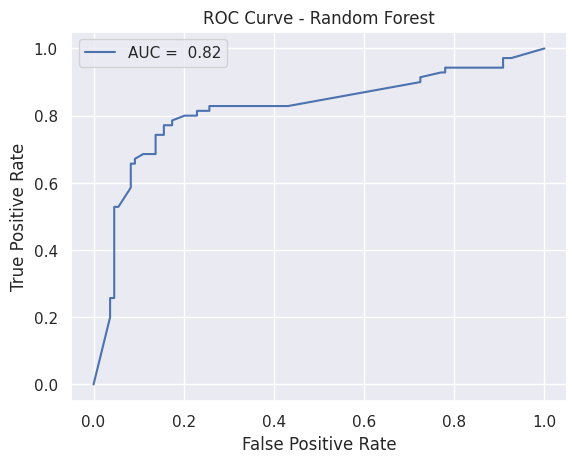

In [95]:
Y_proba = random_forest_model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
auc_score = roc_auc_score(Y_test, Y_proba) # Calculate AUC score

plt.plot(fpr, tpr, label = f"AUC = {auc_score : .2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

In [97]:
# Model Training
model = LogisticRegression()
#traing the logistic regression with model training data
model.fit(X_train, Y_train)


LogisticRegression()

model Evaluation


In [98]:
#accuracy score
#accuracy on training data
X_train_prediction = model.predict(X_train)
print(X_train_prediction)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)


[0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1
 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1
 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0
 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0
 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 

In [99]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

[0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1
 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0
 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1]
Accuracy score of test data :  0.8100558659217877
